## Library and Data Imports

In [1]:
#Importing the basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Importing the libraries for data preparation
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

#Importing the libraries for model training
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Importing Libraries for performance and accuracy testing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Reading the dataset 
data = pd.read_excel('concrete_compressive_strength/Concrete_Data.xls')

# Inspect the dataset
print("First 5 rows of the dataset:")
data.head(5)

C:\Users\st7725\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\st7725\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


First 5 rows of the dataset:


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## Exploratory Data Analysis 

In [2]:
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive streng

In [3]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       Cement (component 1)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  281.165631   
std                                   104.507142   
min                                   102.000000   
25%                                   192.375000   
50%                                   272.900000   
75%                                   350.000000   
max                                   540.000000   

       Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
count                                        1030.000000       
mean                                           73.895485       
std                                            86.279104       
min                                             0.000000       
25%                                             0.000000       
50%                                            22.000000       
75%                                           142.950000      

In [4]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64


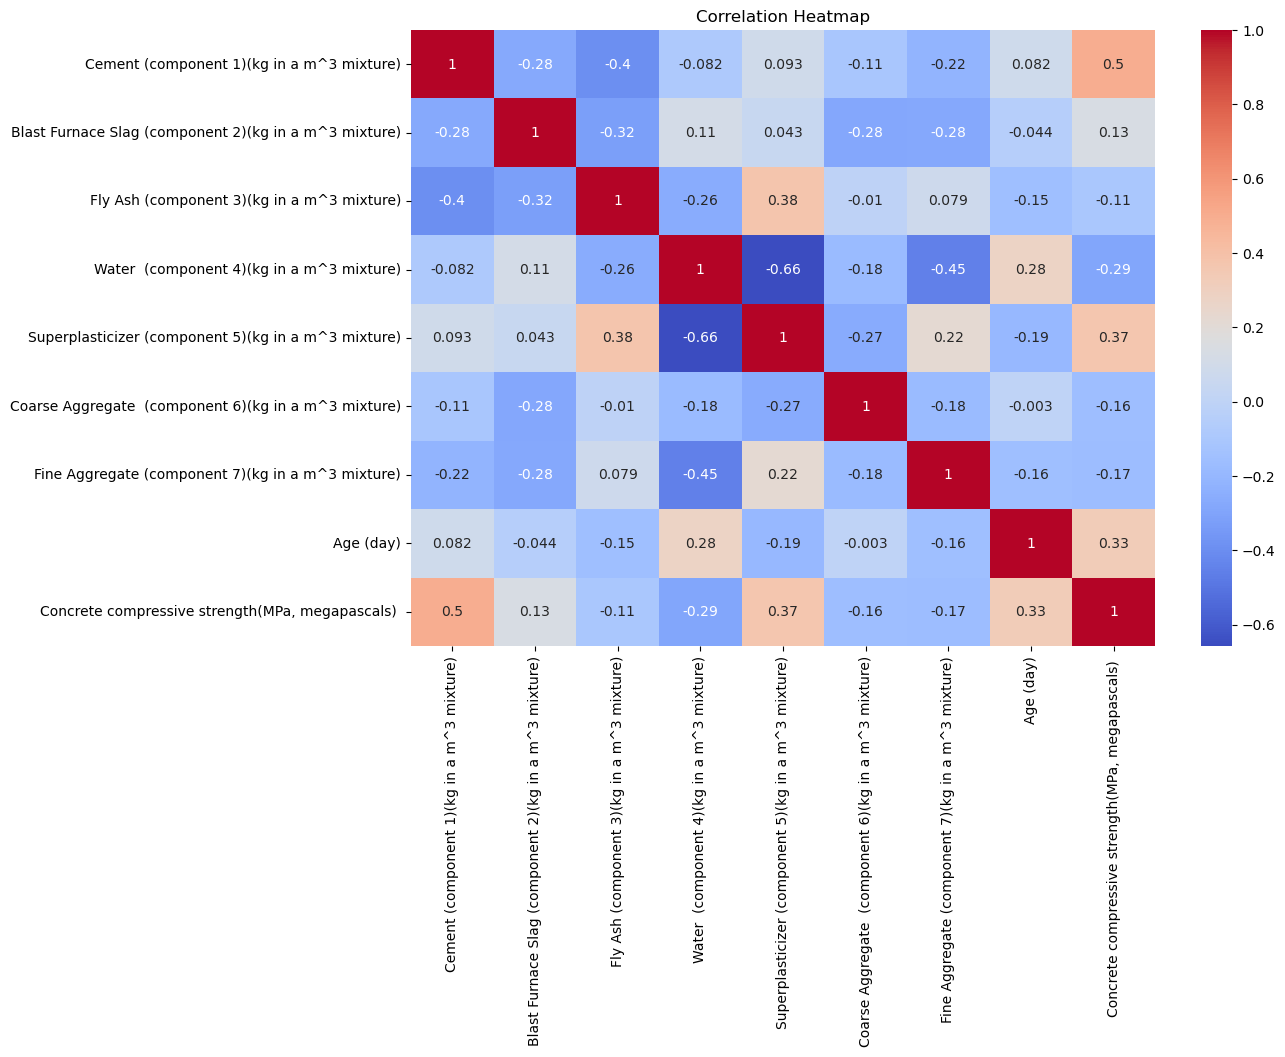

In [5]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Data Preparation 

In [6]:
#Splitting Features into features (X) and target variable (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [7]:
column_names = data.columns[:-1]

categorical_columns = [
    column_names.get_loc(col) for col in column_names
    if data[col].dtype == 'object' or data[col].dtype.name == 'category'
]

# Step 4: Check if there are any categorical columns
if categorical_columns:
    print(f"Categorical columns detected (by index): {categorical_columns}")
    print(f"Categorical column names: {[column_names[i] for i in categorical_columns]}")
    ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_columns)],remainder='passthrough')
    X = np.array(ct.fit_transform(X))
    print("One-hot encoding applied to the categorical columns.")
else:
    print("No categorical columns detected. One-hot encoding is not needed.")
    X = X  # Keep the dataset as-is

No categorical columns detected. One-hot encoding is not needed.


In [8]:
#Feature Scaling
y = y.reshape(len(y),1)
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [9]:
#Splitting the Training and the Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Model Training 

In [10]:
#Multiple Linear Regression
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

LinearRegression()

In [11]:
#Polynomial Linear Regression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
plr_model = LinearRegression()
plr_model.fit(X_poly, y)

LinearRegression()

In [12]:
#Support Vector Machine Regression
y_ravel = y.ravel()

svm_model = SVR(kernel = 'rbf')
svm_model.fit(X, y_ravel)

SVR()

In [13]:
#Decision Tree Regression 
dt_model = DecisionTreeRegressor(random_state = 0)
dt_model.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [14]:
#Random Forest Regression
rf_model = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_model.fit(X, y_ravel)

RandomForestRegressor(n_estimators=10, random_state=0)

## Model Testing 

In [15]:
#Multiple Linear Regression
y_mlr_pred = mlr_model.predict(X_test)

In [16]:
#Polynomial Linear Regression
X_test_poly = poly_reg.transform(X_test)
y_plr_pred = plr_model.predict(X_test_poly)

In [17]:
#Support Vector Machine Regression
y_svm_pred = svm_model.predict(X_test)

In [18]:
#Decision Tree Regression 
y_dt_pred = dt_model.predict(X_test)

In [19]:
#Random Forest Regression
y_rf_pred = rf_model.predict(X_test)

## Model Performance and Selection 

In [20]:
models = {
    "Mulitple Linear Regression": y_mlr_pred,
    "Polynomial Linear Regression": y_plr_pred,
    "Support Vector Machine Regression": y_svm_pred,
    "Decision Tree Regression": y_dt_pred,
    "Random Forest Regression": y_rf_pred
}

results = []

for i in models:
    #Mean Absolute Error (MAE):
    mae = mean_absolute_error(y_test, models[i])
    #Mean Squared Error (MSE):
    mse = mean_squared_error(y_test, models[i])
    #Root Mean Squared Error (RMSE):
    rmse = np.sqrt(mse)
    #R-squared (R²):
    r2 = r2_score(y_test, models[i])
    # Store results
    results.append({"Model": i,"MAE": mae,"MSE": mse,"RMSE": rmse,"R²": r2})
    
# Convert results to a DataFrame
results_df = pd.DataFrame(results)
results_df

,Model,MAE,MSE,RMSE,R²
0,Mulitple Linear Regression,0.471045,0.343014,0.585674,0.636898
1,Polynomial Linear Regression,0.092941,0.019917,0.141126,0.978917
2,Support Vector Machine Regression,0.240931,0.109869,0.331465,0.883697
3,Decision Tree Regression,0.001373,0.000119,0.010895,0.999874
4,Random Forest Regression,0.083989,0.015884,0.126033,0.983185


In [21]:
# Normalize metrics for ranking (lower is better for MAE, MSE, RMSE; higher is better for R²)
results_df["MAE_rank"] = results_df["MAE"].rank(ascending=True)  # Lower MAE is better
results_df["MSE_rank"] = results_df["MSE"].rank(ascending=True)  # Lower MSE is better
results_df["RMSE_rank"] = results_df["RMSE"].rank(ascending=True)  # Lower RMSE is better
results_df["R²_rank"] = results_df["R²"].rank(ascending=False)  # Higher R² is better

# Calculate an overall score (average rank across metrics)
results_df["Overall_Score"] = results_df[["MAE_rank", "MSE_rank", "RMSE_rank", "R²_rank"]].mean(axis=1)

# Sort models by overall score (lower score = better model)
results_df = results_df.sort_values(by="Overall_Score").reset_index(drop=True)

# Identify the best model
best_model = results_df.iloc[0]

# Print the results
print("Model Performance Rankings:")
print(results_df)

# Interpret the best model
print("\nThe Best Model is:")
print(f"Model: {best_model['Model']}")
print(f"Reasons:")
print(f"- Lowest MAE: {best_model['MAE']} (Rank: {best_model['MAE_rank']:.1f})")
print(f"- Lowest MSE: {best_model['MSE']} (Rank: {best_model['MSE_rank']:.1f})")
print(f"- Lowest RMSE: {best_model['RMSE']} (Rank: {best_model['RMSE_rank']:.1f})")
print(f"- Highest R²: {best_model['R²']} (Rank: {best_model['R²_rank']:.1f})")


Model Performance Rankings:
                               Model       MAE       MSE      RMSE        R²  \
0           Decision Tree Regression  0.001373  0.000119  0.010895  0.999874   
1           Random Forest Regression  0.083989  0.015884  0.126033  0.983185   
2       Polynomial Linear Regression  0.092941  0.019917  0.141126  0.978917   
3  Support Vector Machine Regression  0.240931  0.109869  0.331465  0.883697   
4         Mulitple Linear Regression  0.471045  0.343014  0.585674  0.636898   

   MAE_rank  MSE_rank  RMSE_rank  R²_rank  Overall_Score  
0       1.0       1.0        1.0      1.0            1.0  
1       2.0       2.0        2.0      2.0            2.0  
2       3.0       3.0        3.0      3.0            3.0  
3       4.0       4.0        4.0      4.0            4.0  
4       5.0       5.0        5.0      5.0            5.0  

The Best Model is:
Model: Decision Tree Regression
Reasons:
- Lowest MAE: 0.0013730592959687491 (Rank: 1.0)
- Lowest MSE: 0.000118708950